#**To do:**

- [define factors](https://happiness-report.s3.amazonaws.com/2021/Appendix1WHR2021C2.pdf)
- put labels on graphs
- graph ladder score over all years for each country



# Imports

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Pre-Processing

In [8]:
# read csv files into data frames
df = pd.read_csv("data/world-happiness-report.csv")
df2021 = pd.read_csv("data/world-happiness-report-2021.csv")

In [9]:
# Add column for year on the data set for 2021
df2021['Year'] = 2021

In [10]:
list(df.columns)

['Country name',
 'year',
 'Life Ladder',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect']

In [11]:
list(df2021.columns)

['Country name',
 'Regional indicator',
 'Ladder score',
 'Standard error of ladder score',
 'upperwhisker',
 'lowerwhisker',
 'Logged GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Ladder score in Dystopia',
 'Explained by: Log GDP per capita',
 'Explained by: Social support',
 'Explained by: Healthy life expectancy',
 'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Perceptions of corruption',
 'Dystopia + residual',
 'Year']

In [12]:
# drop unnecessary columns
df2021 = df2021.drop(columns=['Standard error of ladder score','upperwhisker', 'lowerwhisker',
       'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'], axis=1)
df = df.drop(columns=['Positive affect','Negative affect'], axis=1)

In [13]:
# rename columns so that the data in the two files can be compared with by the same variable names
df2021 = df2021.rename(columns = {'Logged GDP per capita':'Log GDP per capita'} )
df = df.rename(columns= {'year':'Year', 'Life Ladder':'Ladder score', 'Healthy life expectancy at birth' : 'Healthy life expectancy'}) #we assume that healthy life expectancy at birth is the same as healthy life expectancy 

In [14]:
# add regional indicator to data set for 2008-2020
df_with_regions = pd.merge(df, df2021[['Country name','Regional indicator']], on = ['Country name'])
# df_with_regions
df_with_regions["Year"].unique() #does not include 2021

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2007, 2020, 2006, 2005])

In [15]:
# combine data sets to create one data frame for 2008-2021
df_all = pd.concat([df_with_regions, df2021], ignore_index=True).sort_values(by="Country name", ascending=True)
years_list = list(df_all["Year"].unique())
years_list

[2008,
 2019,
 2018,
 2017,
 2016,
 2015,
 2021,
 2013,
 2012,
 2011,
 2010,
 2009,
 2014,
 2020,
 2007,
 2006,
 2005]

In [16]:
# reorder columns
df_all = df_all[['Country name',
                 'Regional indicator',
                 'Year',
                 'Ladder score',
                 'Log GDP per capita',
                 'Healthy life expectancy',
                 'Social support',
                 'Freedom to make life choices',
                 'Generosity',
                 'Perceptions of corruption']]

In [17]:
# add column for time in terms of COVID
def covid_time(row):
    if row["Year"] < 2020:
        return "Pre-COVID"
    else:
        return "Post-COVID"

df_all["COVID time"] = df_all.apply(covid_time, axis=1)
df_all

Country name  Regional indicator  Year  Ladder score  Log GDP per capita  \
0     Afghanistan          South Asia  2008         3.724               7.370   
11    Afghanistan          South Asia  2019         2.375               7.697   
10    Afghanistan          South Asia  2018         2.694               7.692   
9     Afghanistan          South Asia  2017         2.662               7.697   
8     Afghanistan          South Asia  2016         4.220               7.697   
...           ...                 ...   ...           ...                 ...   
1873     Zimbabwe  Sub-Saharan Africa  2008         3.174               7.461   
1871     Zimbabwe  Sub-Saharan Africa  2006         3.826               7.711   
2033     Zimbabwe  Sub-Saharan Africa  2021         3.145               7.943   
1877     Zimbabwe  Sub-Saharan Africa  2012         4.955               7.983   
1885     Zimbabwe  Sub-Saharan Africa  2020         3.160               7.829   

      Healthy life expectancy  Social support  Freedom to make life choices  \
0                      50.800           0.451                         0.718   
11                     52.400           0.420                         0.394   
10                     52.600           0.508                         0.374   
9                      52.800           0.491                         0.427   
8                      53.000           0.559                         0.523   
...                       ...             ...                           ...   
1873                   44.140           0.843                         0.344   
1871                   41.580           0.822                         0.431   
2033                   56.201           0.750                         0.677   
1877                   49.540           0.896                         0.470   
1885                   56.800           0.717                         0.643   

      Generosity  Perceptions of corruption  COVID time  
0          0.168                      0.882   Pre-COVID  
11        -0.108                      0.924   Pre-COVID  
10        -0.094                      0.928   Pre-COVID  
9         -0.121                      0.954   Pre-COVID  
8          0.042                      0.793   Pre-COVID  
...          ...                        ...         ...  
1873      -0.090                      0.964   Pre-COVID  
1871      -0.076                      0.905   Pre-COVID  
2033      -0.047                      0.821  Post-COVID  
1877      -0.103                      0.859   Pre-COVID  
1885      -0.009                      0.789  Post-COVID  

[2035 rows x 11 columns]

In [18]:
list(df_all.columns)

['Country name',
 'Regional indicator',
 'Year',
 'Ladder score',
 'Log GDP per capita',
 'Healthy life expectancy',
 'Social support',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'COVID time']

# Average Ladder Score by Region

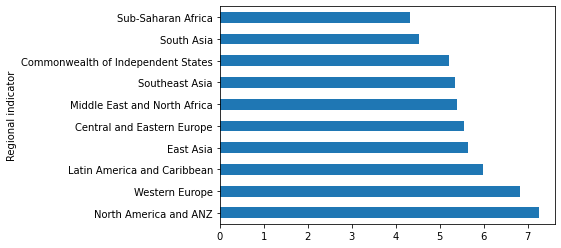

In [19]:
df_all.groupby('Regional indicator')['Ladder score'].mean().sort_values(ascending=False).plot.barh()

# Pre-COVID vs. Post-COVID

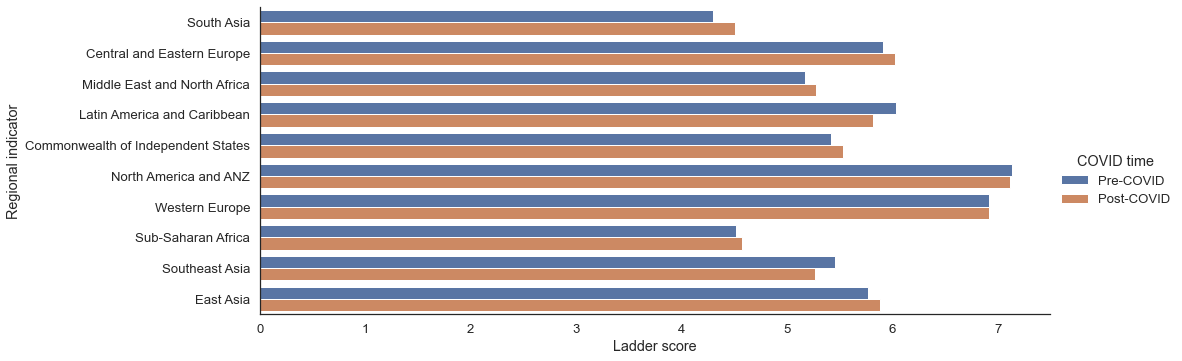

In [121]:
sns.set(style="white", font_scale=1.2)
covid_plot = sns.catplot(x="Ladder score", y="Regional indicator", hue="COVID time", data=df_all[df_all['Year'] >= 2018], kind="bar", ci=None, height=5, aspect=3)
# plt.savefig('figures/compare.png', dpi=300, bbox_inches='tight')

# Regional Indicator Line Graph

Text(22.54162133333331, 0.5, 'Ladder score')

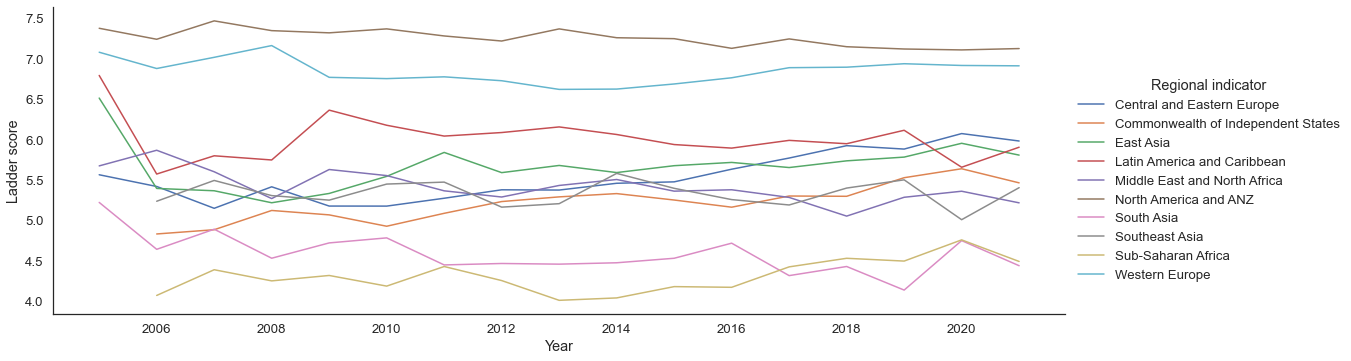

In [15]:
df_region = df_all.groupby(['Regional indicator', 'Year'])['Ladder score'].mean().to_frame().reset_index()
df_pivot_region = df_region.pivot("Year", "Regional indicator", "Ladder score")

sns.set(style="white", font_scale=1.2)
sns.relplot(data=df_pivot_region, kind="line", height=5, aspect=3, dashes=False)
plt.ylabel("Ladder score")

# Sort Countries by Average Ladder Score (All Years)

In [82]:
df_all_ladder = df_all.groupby('Country name')['Ladder score'].mean().sort_values(ascending=False)
df_all_ladder

Country name
Denmark        7.676625
Finland        7.614643
Switzerland    7.550364
Norway         7.501455
Netherlands    7.466133
                 ...   
Tanzania       3.692687
Rwanda         3.636000
Togo           3.610200
Burundi        3.586000
Afghanistan    3.512231
Name: Ladder score, Length: 149, dtype: float64

# Compare Two Factors

## Social Support vs. Ladder Score

Text(0, 0.5, 'Ladder score')

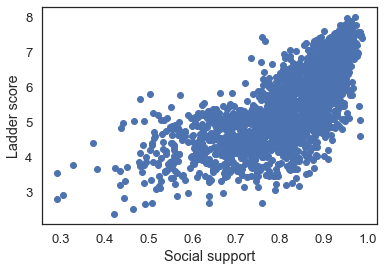

In [17]:
mydata = df_all[["Social support", "Ladder score"]].dropna(how="any")
vals = mydata.values
plt.scatter(vals[:, 0], vals[:, 1])
plt.xlabel("Social support")
plt.ylabel("Ladder score")

## Correlation Table

In [87]:
df_all.corr()

Year  Ladder score  Log GDP per capita  \
Year                          1.000000      0.038226            0.071433   
Ladder score                  0.038226      1.000000            0.789687   
Log GDP per capita            0.071433      0.789687            1.000000   
Healthy life expectancy       0.166578      0.744895            0.847429   
Social support               -0.004543      0.710707            0.704224   
Freedom to make life choices  0.237245      0.522491            0.360170   
Generosity                   -0.044313      0.181507           -0.016865   
Perceptions of corruption    -0.087272     -0.440817           -0.349512   

                              Healthy life expectancy  Social support  \
Year                                         0.166578       -0.004543   
Ladder score                                 0.744895        0.710707   
Log GDP per capita                           0.847429        0.704224   
Healthy life expectancy                      1.000000        0.615175   
Social support                               0.615175        1.000000   
Freedom to make life choices                 0.390519        0.417165   
Generosity                                   0.009876        0.059964   
Perceptions of corruption                   -0.336120       -0.228886   

                              Freedom to make life choices  Generosity  \
Year                                              0.237245   -0.044313   
Ladder score                                      0.522491    0.181507   
Log GDP per capita                                0.360170   -0.016865   
Healthy life expectancy                           0.390519    0.009876   
Social support                                    0.417165    0.059964   
Freedom to make life choices                      1.000000    0.321830   
Generosity                                        0.321830    1.000000   
Perceptions of corruption                        -0.490298   -0.281714   

                              Perceptions of corruption  
Year                                          -0.087272  
Ladder score                                  -0.440817  
Log GDP per capita                            -0.349512  
Healthy life expectancy                       -0.336120  
Social support                                -0.228886  
Freedom to make life choices                  -0.490298  
Generosity                                    -0.281714  
Perceptions of corruption                      1.000000

# Heat Map for Correlation

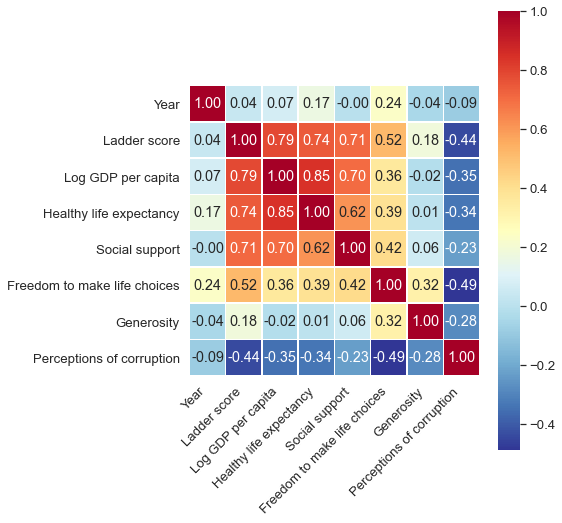

In [123]:
f,ax=plt.subplots(figsize=(8,8))
corrMatrix = df_all.corr()
hmap = sns.heatmap(corrMatrix, annot=True, linewidth=.5,fmt='.2f',ax=ax, square=True, cmap='RdYlBu_r')
hmap.set_xticklabels(hmap.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.savefig('figures/heatmap.png', dpi=300, bbox_inches='tight')

# Clustering Attempt

In [227]:
df_all.select_dtypes(include='number').columns

Index(['Year', 'Ladder score', 'Log GDP per capita', 'Healthy life expectancy',
       'Social support', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

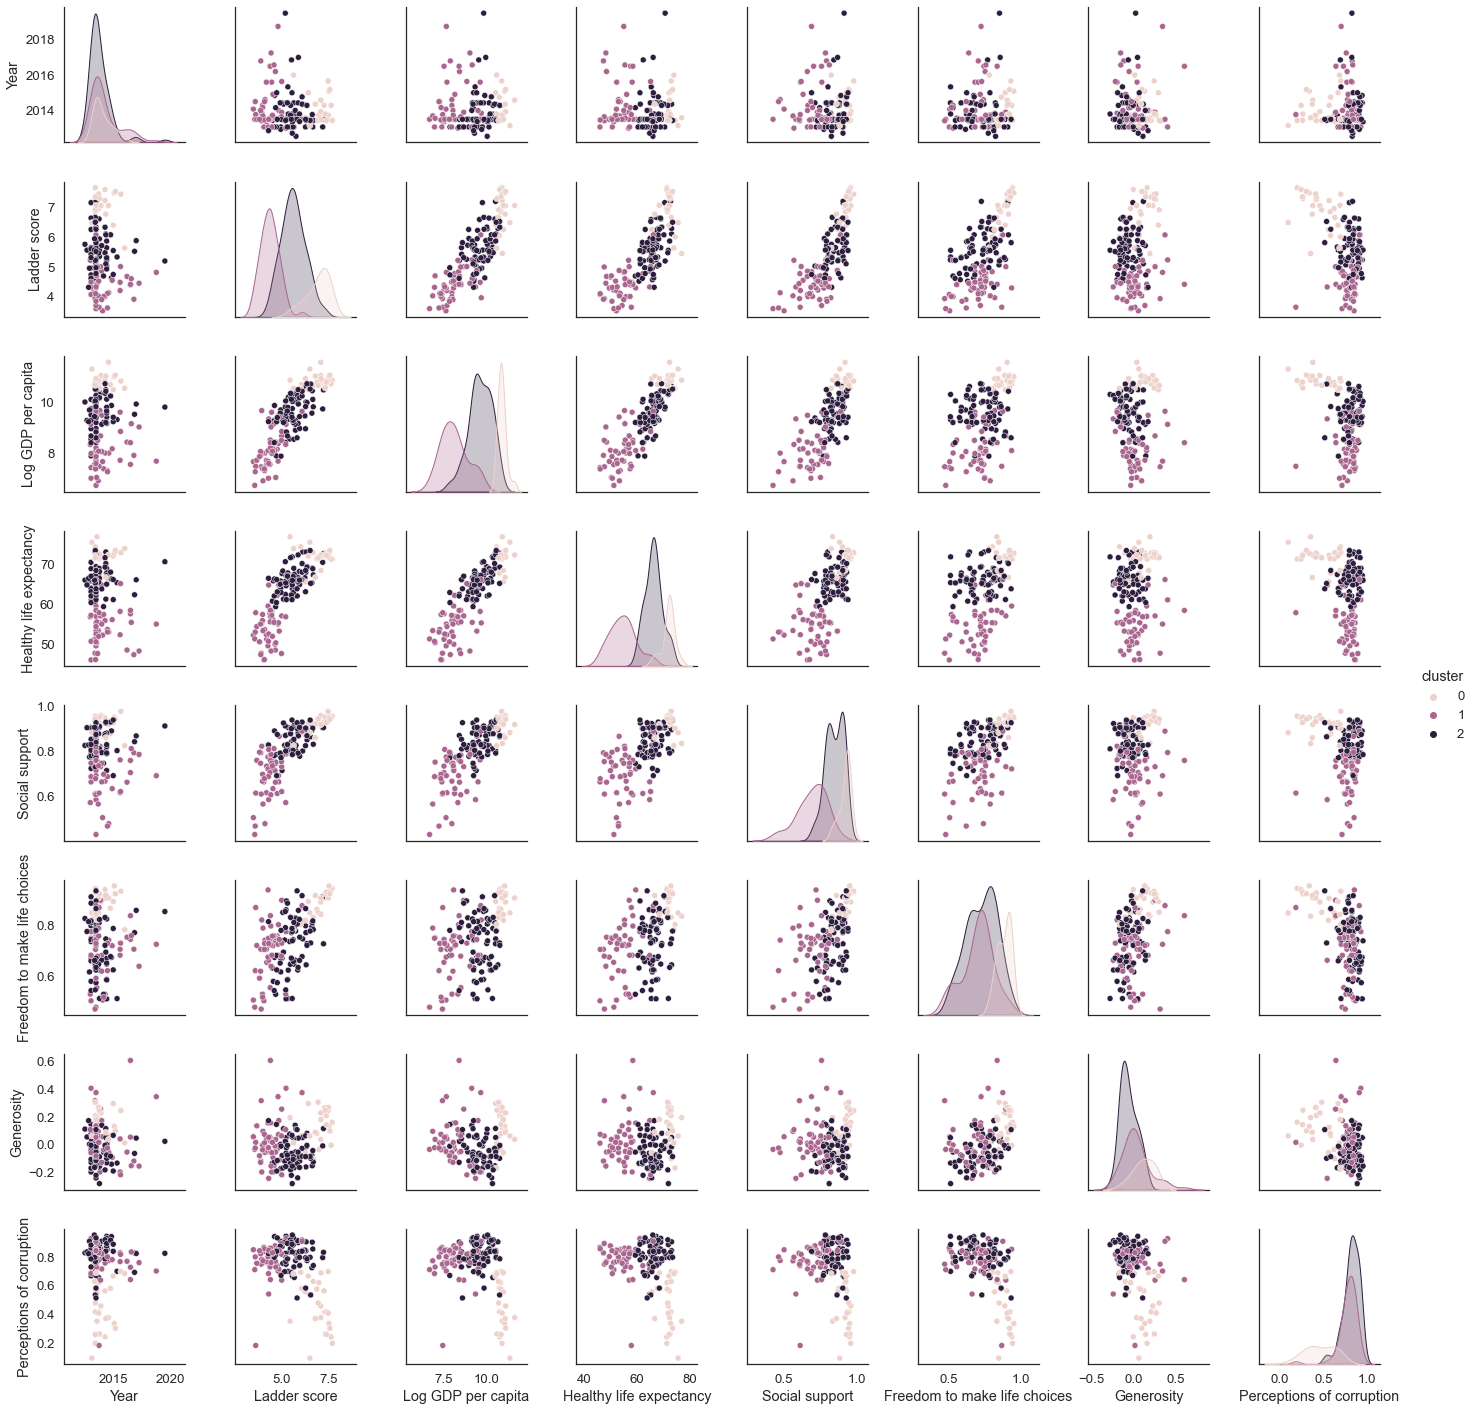

In [238]:
from sklearn import mixture

start = df_all.groupby('Country name').mean()

X = start.select_dtypes(include='number')
X = X[['Log GDP per capita', 'Healthy life expectancy', 'Social support', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].copy()

model = mixture.GaussianMixture(n_components=3, covariance_type='full') 
model.fit(X)
y = model.predict(X)

to_plot = start.copy().reset_index()
to_plot.loc[:, 'cluster'] = pd.Series(y)

sns.set(style="white", font_scale=1.2)
# sns.relplot(hue='cluster', x='Log GDP per capita', y='Healthy life expectancy', data=to_plot, kind="scatter", ci=None, height=5, aspect=3)
pair = sns.pairplot(data=to_plot, hue='cluster');
# pair.savefig('figures/pairplot_3clusters.png', dpi=300, bbox_inches='tight')

# Pandas Profiling

In [1]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip   
!conda install -c conda-forge pandas-profiling -y

Solving environment: done

## Package Plan ##

  environment location: /Users/varunsaini/opt/anaconda3/envs/env

  added / updated specs:
    - pandas-profiling


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pandas-profiling-1.4.1     |                0          39 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          39 KB

The following NEW packages will be INSTALLED:

  pandas-profiling   conda-forge/osx-64::pandas-profiling-1.4.1-0



pandas-profiling-1.4 | 39 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [20]:
# from pandas_profiling import ProfileReport

     \ 34.6 MB 5.7 MB/s     - 26.2 MB 7.5 MB/s
     |████████████████████████████████| 2.6 MB 4.3 MB/s eta 0:00:01    |▍                               | 30 kB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 12.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 25.5 MB/s eta 0:00:01     |███████▍                        | 256 kB 25.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 27.5 MB/s eta 0:00:01
     |████████████████████████████████| 295 kB 13.5 MB/s eta 0:00:01
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248502 sha256=1e2e10e31dc09722efd8dae2d5feba6c96ffbeb061648f1bcd495e1eb79b5914
  Stored in directory: /private/var/folders/7v/ywgws2fs29jcpb2l_nl5ldqm0000gn/T/pip-ephem-wheel-cache-66cayq3r/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=cb763c70b74f1a6e84d9f0def742641dc26

In [21]:
# my_report = ProfileReport(df_all, title="My Report (July 10)", html={'style':{'full width':True}})
# my_report.to_notebook_iframe()
# my_report.to_file(output_file="My Report (July 10).html")

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]